<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
# IMPORTS
import pandas as pd
import re

import gensim
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [2]:
#Start Here
url = 'data/amazon_reviews.csv'
df = pd.read_csv(url)
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [3]:
from ast import literal_eval

# df['reviews.text'] = df['reviews.text'].apply(literal_eval)

In [4]:
df['reviews.text'] = df['reviews.text'].str.lower()

In [5]:
stop_words = [
    'amazon',
]

In [6]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [7]:
stops = nlp.Defaults.stop_words.union(stop_words)

In [8]:
def remove_stops(_str_):
    words = re.sub('[^a-zA-Z 0-9]', '', _str_)
    words = words.lower().split()
    tokens = []
    for word in words:
        if word in stops:
            pass
        else:
            tokens.append(word)
    
    
    return tokens

In [9]:
from tqdm import tqdm
import re

tqdm.pandas()

df['clean_keywords'] = df['reviews.text'].apply(remove_stops)

/Users/erbun/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-CZTl3FZ9/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [10]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,clean_keywords
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,i order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...","[order, 3, item, bad, quality, missing, backup..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...","[bulk, expensive, way, products, like]"
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,well they are not duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...","[duracell, price, happy]"
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...","[work, brand, batteries, better, price]"
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,these batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...","[batteries, long, lasting, price, great]"


In [11]:
id2word = corpora.Dictionary(df['clean_keywords'])

In [12]:
len(id2word.keys())

12614

In [13]:
id2word.filter_extremes(no_below=5, no_above=0.95)
print('I am done!')

I am done!


In [14]:
len(id2word.keys())

3757

In [15]:
corpus = [id2word.doc2bow(text) for text in df['clean_keywords']]

In [16]:
corpus[311]

[(3, 1), (17, 1), (175, 1), (778, 1)]

In [18]:
id2word[311]

'come'

In [19]:
# Create our LDA model

lda = LdaMulticore(corpus=corpus,
                  id2word=id2word,
                  num_topics=20,
                  passes=50,
                  workers=12)

In [20]:
lda.print_topics()

[(0,
  '0.038*"charge" + 0.032*"black" + 0.027*"friday" + 0.027*"tablet" + 0.020*"charging" + 0.016*"case" + 0.014*"charger" + 0.013*"bought" + 0.013*"purchased" + 0.011*"battery"'),
 (1,
  '0.125*"kindle" + 0.040*"fire" + 0.038*"new" + 0.022*"best" + 0.021*"love" + 0.019*"buy" + 0.014*"old" + 0.014*"family" + 0.013*"bought" + 0.013*"got"'),
 (2,
  '0.024*"device" + 0.020*"apps" + 0.016*"use" + 0.014*"screen" + 0.013*"dont" + 0.013*"tablet" + 0.012*"like" + 0.010*"home" + 0.008*"download" + 0.008*"need"'),
 (3,
  '0.043*"great" + 0.037*"buy" + 0.030*"learning" + 0.029*"best" + 0.020*"tool" + 0.018*"satisfied" + 0.015*"little" + 0.014*"tablet" + 0.014*"job" + 0.013*"im"'),
 (4,
  '0.037*"ipad" + 0.036*"perfect" + 0.034*"size" + 0.033*"tablet" + 0.023*"like" + 0.021*"prime" + 0.016*"small" + 0.016*"carry" + 0.011*"right" + 0.011*"laptop"'),
 (5,
  '0.118*"batteries" + 0.024*"long" + 0.020*"brand" + 0.014*"battery" + 0.013*"brands" + 0.012*"price" + 0.012*"dont" + 0.011*"buy" + 0.011*"use

In [21]:
words = [re.findall(r'"[^"]*"', t[1]) for t in lda.print_topics(20)]

In [22]:
topic_labels = [', '.join(t[0:5]) for t in words]

In [25]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [26]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/Users/erbun/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-CZTl3FZ9/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.168250  0.032639       1        1  18.756585
13     0.200416 -0.252745       2        1   5.933946
17     0.106706 -0.093802       3        1   5.860524
19    -0.192121 -0.108918       4        1   5.636208
18    -0.316537 -0.041560       5        1   5.580573
12     0.033741  0.068355       6        1   4.848297
14     0.049161  0.092761       7        1   4.669926
11     0.017878  0.105394       8        1   4.663546
6      0.115295  0.106014       9        1   4.502808
2      0.043400  0.180539      10        1   4.491534
1      0.037846  0.025043      11        1   4.001069
4      0.066827  0.152506      12        1   3.918785
9     -0.064213  0.106113      13        1   3.833362
15     0.107931 -0.218740      14        1   3.799742
10     0.037075  0.065619      15        1   3.719295
7     -0.292234 -0.087735      16        1   3.571676
0     -0.034928  0.006087      17        1   3.487728
8      0.132222  0.002197      18        1   3.209401
16     0.136473 -0.051801      19        1   3.150074
3     -0.016690 -0.087966      20        1   2.364921, topic_info=          Term         Freq        Total Category  logprob  loglift
33        good  5355.000000  5355.000000  Default  30.0000  30.0000
18   batteries  7316.000000  7316.000000  Default  29.0000  29.0000
21       great  8675.000000  8675.000000  Default  28.0000  28.0000
780       easy  2862.000000  2862.000000  Default  27.0000  27.0000
17       price  4460.000000  4460.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
27      bought    56.272736  3160.492609  Topic20  -4.8847  -0.2838
162  recommend    46.623615  1112.589338  Topic20  -5.0728   0.5721
675      games    46.284049  1782.189063  Topic20  -5.0801   0.0936
161    product    45.451701  1856.971430  Topic20  -5.0983   0.0344
105     things    39.464351   560.412598  Topic20  -5.2395   1.0912

[1457 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
415       1  0.204770        1
415       2  0.096362        1
415       3  0.096362        1
415      10  0.052196        1
415      13  0.060226        1
...     ...       ...      ...
1284      2  0.789104      yrs
1284      4  0.150306      yrs
2845     18  0.841821  zippers
1575      4  0.072205     zone
1575     20  0.866464     zone

[4270 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 14, 18, 20, 19, 13, 15, 12, 7, 3, 2, 5, 10, 16, 11, 8, 1, 9, 17, 4])

In [27]:
distro = [lda[doc] for doc in corpus]

/Users/erbun/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-CZTl3FZ9/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
def update(doc):
    d_dist = {k:0 for k in range(0,20)}
    for t in doc:
        d_dist[t[0]] = t[1]
    return d_dist

new_distro = [update(doc) for doc in distro] 

/Users/erbun/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-CZTl3FZ9/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
topics = pd.DataFrame.from_records(new_distro)
topics.columns = topic_labels

/Users/erbun/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-CZTl3FZ9/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
"charge", "black", "friday", "tablet", "charging"

------ Topic 1 ------
"kindle", "fire", "new", "best", "love"

------ Topic 2 ------
"device", "apps", "use", "screen", "dont"

------ Topic 3 ------
"great", "buy", "learning", "best", "tool"

------ Topic 4 ------
"ipad", "perfect", "size", "tablet", "like"

------ Topic 5 ------
"batteries", "long", "brand", "battery", "brands"

------ Topic 6 ------
"read", "books", "reading", "kindle", "tablet"

------ Topic 7 ------
"work", "great", "value", "batteries", "money"

------ Topic 8 ------
"games", "play", "tablet", "apps", "google"

------ Topic 9 ------
"tablet", "screen", "great", "good", "little"

------ Topic 10 ------
"user", "card", "friendly", "kindles", "sd"

------ Topic 11 ------
"fire", "hd", "better", "8", "screen"

------ Topic 12 ------
"tablet", "music", "great", "apps", "tablets"

------ Topic 13 ------
"old", "year", "loves", "bought", "tablet"

------ Topic 14 ------
"easy", "use", "light", "sc

/Users/erbun/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-CZTl3FZ9/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
topics.head()

/Users/erbun/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-CZTl3FZ9/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"""charge"", ""black"", ""friday"", ""tablet"", ""charging""","""kindle"", ""fire"", ""new"", ""best"", ""love""","""device"", ""apps"", ""use"", ""screen"", ""dont""","""great"", ""buy"", ""learning"", ""best"", ""tool""","""ipad"", ""perfect"", ""size"", ""tablet"", ""like""","""batteries"", ""long"", ""brand"", ""battery"", ""brands""","""read"", ""books"", ""reading"", ""kindle"", ""tablet""","""work"", ""great"", ""value"", ""batteries"", ""money""","""games"", ""play"", ""tablet"", ""apps"", ""google""","""tablet"", ""screen"", ""great"", ""good"", ""little""","""user"", ""card"", ""friendly"", ""kindles"", ""sd""","""fire"", ""hd"", ""better"", ""8"", ""screen""","""tablet"", ""music"", ""great"", ""apps"", ""tablets""","""old"", ""year"", ""loves"", ""bought"", ""tablet""","""easy"", ""use"", ""light"", ""screen"", ""great""","""gift"", ""bought"", ""loves"", ""christmas"", ""tablet""","""love"", ""bought"", ""tablet"", ""tablets"", ""grandkids""","""kids"", ""tablet"", ""great"", ""love"", ""time""","""good"", ""price"", ""battery"", ""quality"", ""life""","""great"", ""price"", ""tablet"", ""product"", ""recommend"""
0,0.0000,0.0000,0.0000,0.0000,0.100016,0.000000,0.0000,0.368211,0.0000,0.0000,0.0000,0.0000,0.0000,0.100149,0.0000,0.000000,0.0000,0.0000,0.358872,0.000000
1,0.0000,0.0000,0.0000,0.0000,0.000000,0.841661,0.0000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.000000,0.0000,0.0000,0.000000,0.000000
2,0.0125,0.0125,0.0125,0.0125,0.012500,0.327703,0.0125,0.012500,0.0125,0.0125,0.0125,0.0125,0.0125,0.012500,0.0125,0.226428,0.0125,0.0125,0.012500,0.233364
3,0.0000,0.0000,0.0000,0.0000,0.000000,0.651894,0.0000,0.198104,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.000000,0.0000,0.0000,0.000000,0.000000
4,0.0000,0.0000,0.0000,0.0000,0.000000,0.542835,0.0000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.000000,0.0000,0.0000,0.000000,0.307163


In [33]:
topics.shape

/Users/erbun/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-CZTl3FZ9/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(28332, 20)

In [34]:
df['primary_topic'] = topics.idxmax(axis=1)

/Users/erbun/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-CZTl3FZ9/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
df.head()

/Users/erbun/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-CZTl3FZ9/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,clean_keywords,primary_topic
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,i order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...","[order, 3, item, bad, quality, missing, backup...","""work"", ""great"", ""value"", ""batteries"", ""money"""
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...","[bulk, expensive, way, products, like]","""batteries"", ""long"", ""brand"", ""battery"", ""brands"""
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,well they are not duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...","[duracell, price, happy]","""batteries"", ""long"", ""brand"", ""battery"", ""brands"""
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...","[work, brand, batteries, better, price]","""batteries"", ""long"", ""brand"", ""battery"", ""brands"""
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,these batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...","[batteries, long, lasting, price, great]","""batteries"", ""long"", ""brand"", ""battery"", ""brands"""


In [37]:
def good_bad(_int_):
    if _int_ >= 3:
        return 'good'
    else:
        return 'bad'

/Users/erbun/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-CZTl3FZ9/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
df['good_bad'] = df['reviews.rating'].apply(good_bad)

/Users/erbun/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-CZTl3FZ9/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
df.head()

/Users/erbun/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-CZTl3FZ9/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,clean_keywords,primary_topic,good_bad
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,i order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht...","[order, 3, item, bad, quality, missing, backup...","""work"", ""great"", ""value"", ""batteries"", ""money""",good
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht...","[bulk, expensive, way, products, like]","""batteries"", ""long"", ""brand"", ""battery"", ""brands""",good
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,well they are not duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht...","[duracell, price, happy]","""batteries"", ""long"", ""brand"", ""battery"", ""brands""",good
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht...","[work, brand, batteries, better, price]","""batteries"", ""long"", ""brand"", ""battery"", ""brands""",good
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,these batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht...","[batteries, long, lasting, price, great]","""batteries"", ""long"", ""brand"", ""battery"", ""brands""",good


In [40]:
df['good_bad'].value_counts()

/Users/erbun/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-CZTl3FZ9/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


good    26751
bad      1581
Name: good_bad, dtype: int64

In [42]:
agg = pd.pivot_table(df, values=['reviews.text'], 
                     index=['primary_topic'], 
                     columns=['good_bad'], aggfunc='count')

/Users/erbun/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-CZTl3FZ9/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
agg.head()

/Users/erbun/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-CZTl3FZ9/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


reviews.text      
good_bad                                                   bad  good
primary_topic                                                       
"batteries", "long", "brand", "battery", "brands"          980  4941
"charge", "black", "friday", "tablet", "charging"           64   658
"device", "apps", "use", "screen", "dont"                   55   478
"easy", "use", "light", "screen", "great"                    5  1307
"fire", "hd", "better", "8", "screen"                       33   964

In [46]:
agg = agg.reset_index()

/Users/erbun/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-CZTl3FZ9/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
agg.columns = ['primary_topic', 'negative', 'positive']
agg.head()

/Users/erbun/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-CZTl3FZ9/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,primary_topic,negative,positive
0,"""batteries"", ""long"", ""brand"", ""battery"", ""brands""",980,4941
1,"""charge"", ""black"", ""friday"", ""tablet"", ""charging""",64,658
2,"""device"", ""apps"", ""use"", ""screen"", ""dont""",55,478
3,"""easy"", ""use"", ""light"", ""screen"", ""great""",5,1307
4,"""fire"", ""hd"", ""better"", ""8"", ""screen""",33,964


/Users/erbun/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-CZTl3FZ9/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


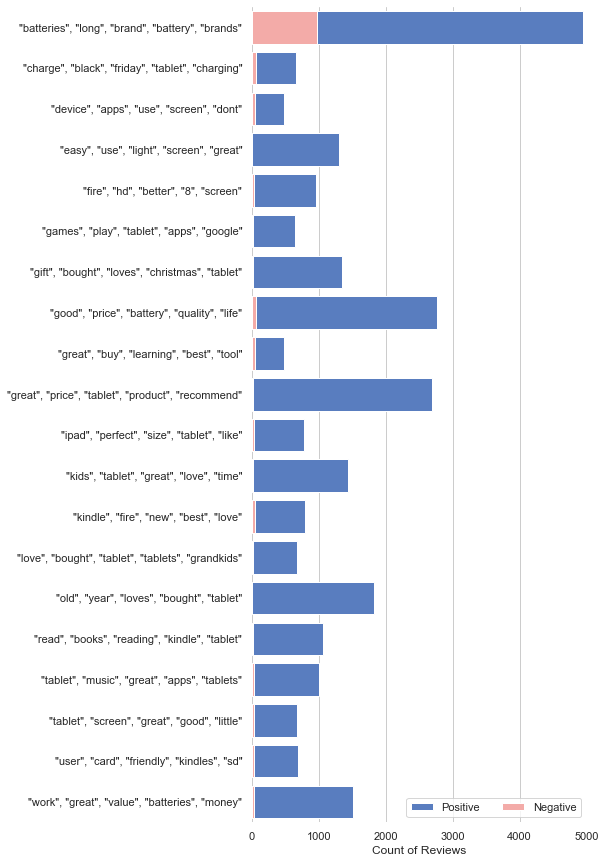

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes('muted')
sns.barplot(x='positive', y='primary_topic', data=agg, label="Positive", color="b")

sns.set_color_codes('pastel')
sns.barplot(x='negative', y='primary_topic', data=agg, label="Negative", color="r")


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,5000), ylabel="", xlabel="Count of Reviews")
sns.despine(left=True, bottom=True)

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling